In [41]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors
from scipy.optimize import minimize

%matplotlib inline
%pylab inline

import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [42]:
noise = np.random.normal(0, 0.2**0.5, size=500)

In [43]:
x = np.random.uniform(0, 100, size=500)

Нарисуем наши точки

In [44]:
y = 0.5 * x + 1 + noise

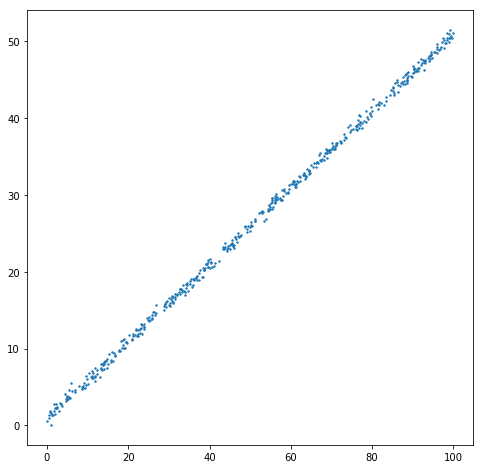

In [45]:
colors = ListedColormap(['red', 'yellow'])

pyplot.figure(figsize(8, 8))
pyplot.scatter(x, y, s=2,cmap = colors)

### MSE

In [46]:
result = minimize(lambda args: ((args[0] * x + args[1] - y)**2).sum(), [1., 0.],
                               method='BFGS')

In [47]:
print result.x

[ 0.50040566  0.97991168]


Значения максимально близки к истинным (без шума)

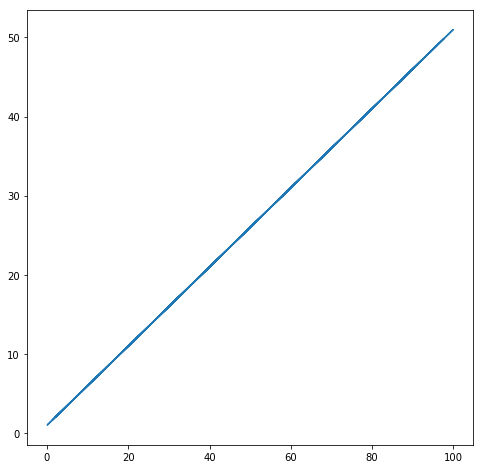

In [48]:
colors = ListedColormap(['red', 'yellow'])

pyplot.figure(figsize(8, 8))
pyplot.plot(x, result.x[0] * x + result.x[1])

Добавим выбросы

In [49]:
noise_2 = np.random.normal(0, 0.2**0.5, size=75)

In [50]:
x_2 = np.random.uniform(0, 100, size=75)

In [51]:
y_2 = -1 + noise_2

In [52]:
y = np.concatenate((y, y_2))

In [53]:
x = np.concatenate((x, x_2))

In [54]:
pairs = zip(x, y)

In [55]:
np.random.shuffle(pairs)

In [56]:
x, y = zip(*pairs)

In [57]:
result_2 = minimize(lambda args: ((args[0] * x + args[1] - y)**2).sum(), [1., 0.],
                               method='BFGS')

/home/valeriyasin/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


Модель не справляется, результат сильно отличается от правильного

In [58]:
print result_2.x

[  1.         -27.80229502]


/home/valeriyasin/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


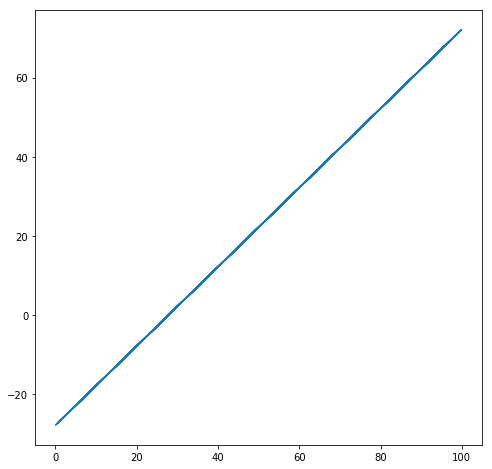

In [59]:
colors = ListedColormap(['red', 'yellow'])

pyplot.figure(figsize(8, 8))
pyplot.plot(x, result_2.x[0] * x + result_2.x[1])

In [60]:
result_3 = minimize(lambda args: (abs(args[0] * x + args[1] - y)).sum(), [1., 0.],
                               method='BFGS')

/home/valeriyasin/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


и с MAE тоже все плохо

In [61]:
print result_3.x

[  1.        -26.5430047]


/home/valeriyasin/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


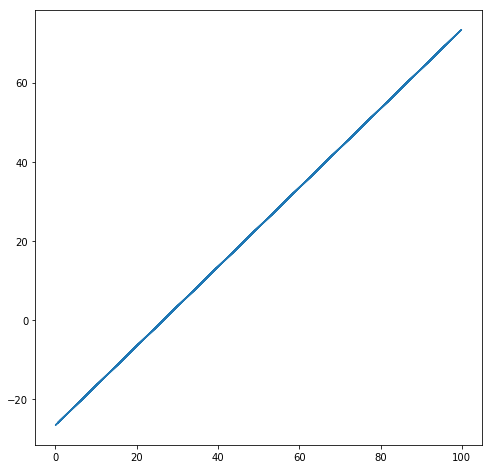

In [63]:
colors = ListedColormap(['red', 'yellow'])

pyplot.figure(figsize(8, 8))
pyplot.plot(x, result_3.x[0] * x + result_3.x[1])